<a href="https://colab.research.google.com/github/Anwarshaikk/NLP/blob/main/Copy_of_Synthetic_Dataset_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

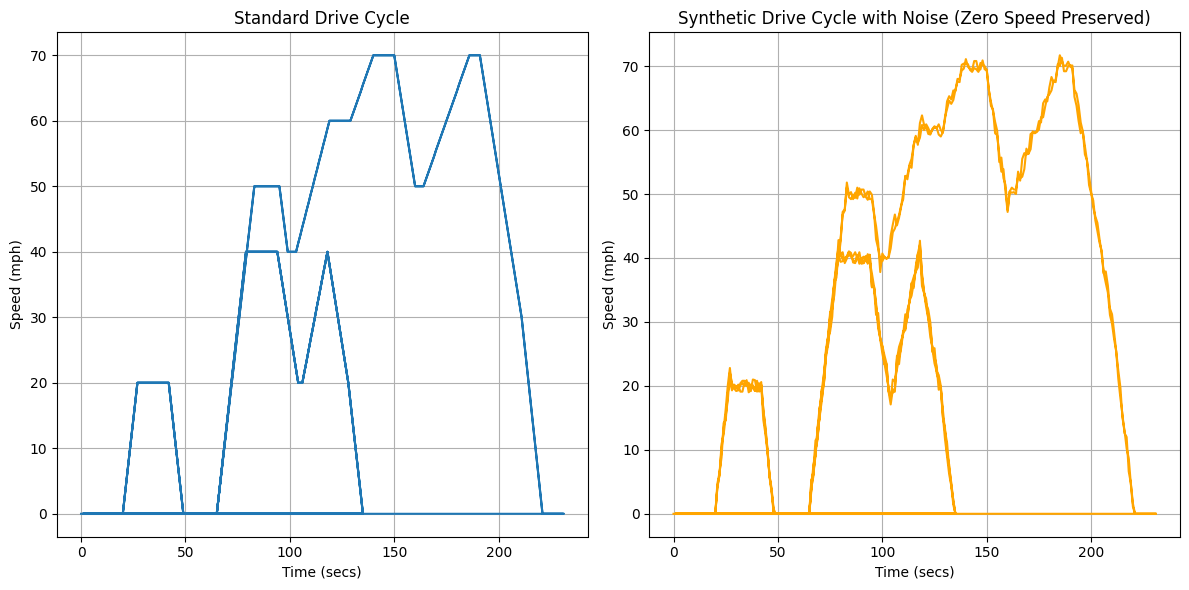

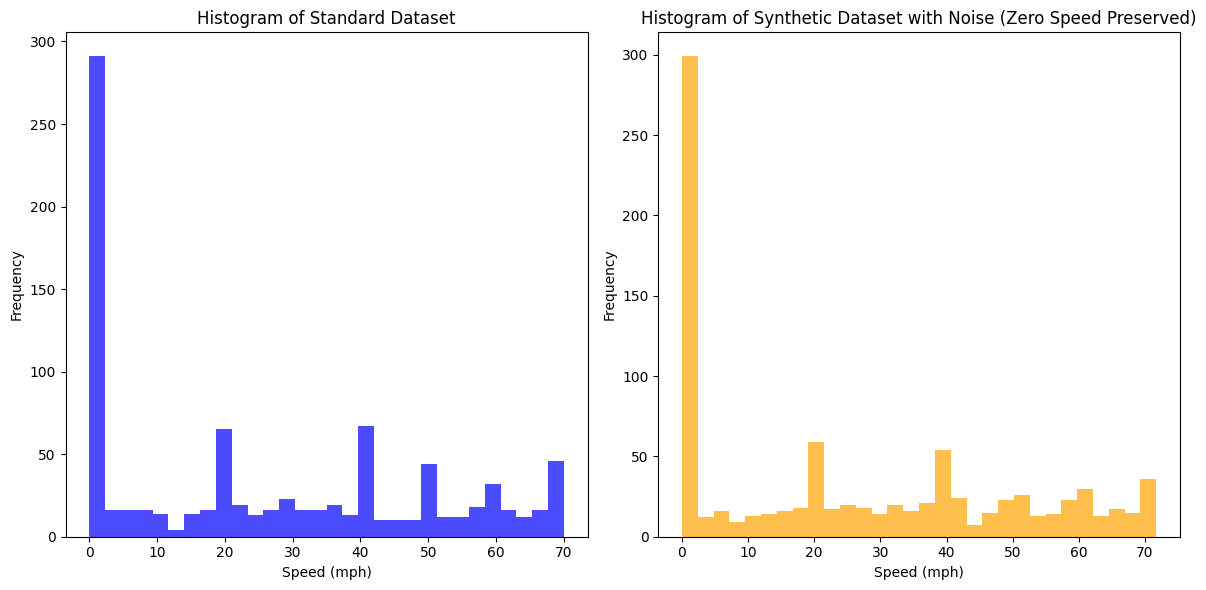

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the standard dataset
standard_data = pd.read_excel('/content/Japanese 10-15 Standard.xlsx')

# Extract the relevant columns (time and speed)
time = standard_data['Test Time, secs']
speed = standard_data['Target Speed, mph']

# Define a function to detect the pattern (accelerating, decelerating, idling)
def detect_pattern(speed_series):
    patterns = []
    for i in range(1, len(speed_series)):
        if speed_series[i] > speed_series[i-1]:
            patterns.append('accelerating')
        elif speed_series[i] < speed_series[i-1]:
            patterns.append('decelerating')
        else:
            patterns.append('idling')
    return patterns

# Define the noise function to add ±3 mph noise with one decimal precision and ensure non-negative speed
def add_noise_with_limit(speed, patterns, noise_range=3, decimal_places=1):
    synthetic_speed = speed.copy()

    for i in range(len(speed)):
        # If the speed is 0 at any point, keep the speed as 0 in the synthetic dataset
        if speed[i] == 0:
            synthetic_speed[i] = 0
        else:
            # Add noise based on the driving pattern
            if patterns[i-1] == 'accelerating':
                noise = np.round(np.random.uniform(0, noise_range), decimals=decimal_places)
            elif patterns[i-1] == 'decelerating':
                noise = np.round(np.random.uniform(-noise_range, 0), decimals=decimal_places)
            else:
                noise = np.round(np.random.uniform(-1, 1), decimals=decimal_places)  # Less noise during idling

            # Apply the noise
            synthetic_speed[i] += noise

        # Ensure no negative speed values
        if synthetic_speed[i] < 0:
            synthetic_speed[i] = 0

    return synthetic_speed

# Detect the patterns of acceleration, deceleration, and idling in the standard dataset
patterns = detect_pattern(speed)

# Apply noise to the speed data (keeping within one decimal place and respecting the patterns)
synthetic_speed = add_noise_with_limit(speed, patterns)

# Create the synthetic dataset by replacing the speed with synthetic values
synthetic_data = standard_data.copy()
synthetic_data['Target Speed, mph'] = synthetic_speed

# Save the synthetic dataset to a new Excel file
synthetic_data.to_excel('synthetic_dataset_with_zero_preserved.xlsx', index=False)

# Plotting the graphs to compare standard and synthetic datasets
plt.figure(figsize=(12, 6))

# Plot the standard dataset
plt.subplot(1, 2, 1)
plt.plot(time, speed, label='Standard Dataset')
plt.title('Standard Drive Cycle')
plt.xlabel('Time (secs)')
plt.ylabel('Speed (mph)')
plt.grid(True)

# Plot the synthetic dataset
plt.subplot(1, 2, 2)
plt.plot(time, synthetic_speed, label='Synthetic Dataset', color='orange')
plt.title('Synthetic Drive Cycle with Noise (Zero Speed Preserved)')
plt.xlabel('Time (secs)')
plt.ylabel('Speed (mph)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot the histograms to compare standard and synthetic datasets
plt.figure(figsize=(12, 6))

# Histogram for standard dataset
plt.subplot(1, 2, 1)
plt.hist(speed, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Standard Dataset')
plt.xlabel('Speed (mph)')
plt.ylabel('Frequency')

# Histogram for synthetic dataset
plt.subplot(1, 2, 2)
plt.hist(synthetic_speed, bins=30, color='orange', alpha=0.7)
plt.title('Histogram of Synthetic Dataset with Noise (Zero Speed Preserved)')
plt.xlabel('Speed (mph)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()